In [1]:
import pandas as pd
import numpy as np    #Customer segmentation   #Pattern recognition
import matplotlib.pyplot as plt

In [2]:
cd /Users/karampruthi/Downloads

/Users/karampruthi/Downloads


In [3]:
Nov = pd.read_excel('New Analysis Data.xlsx',sheet_name=0)
Dec = pd.read_excel('New Analysis Data.xlsx',sheet_name=1)
Jan = pd.read_excel('New Analysis Data.xlsx',sheet_name=2)

data = [Nov,Dec,Jan]

In [4]:
data_join = pd.concat(data)
data_join['location'] = data_join['State'].astype(str) + ', '+ data_join['City'].astype(str)

In [5]:
data_join['Date'] =pd.to_datetime(data_join.Date)
data_join.sort_values(by=['Date'],inplace=True)

In [6]:
data_join.index = pd.to_datetime(data_join.Date)

In [7]:
data_join.drop(['Date'],axis=1)

,Name,Manager,Source,Sub source,Stage,Last Status,Country,State,City,location
Date,,,,,,,,,,
2020-11-01,Vedika Salkar 3,sm001,Diet Clinic,FBA,Followup,Followup,India,Goa,NaN,"Goa, nan"
2020-11-01,Paramita Deb 3,agent05,Diet Clinic,FBA,Followup,Let Us Know,India,West Bengal,Kalyani,"West Bengal, Kalyani"
2020-11-01,harleen kaur 1,agent2,Diet Clinic,OW AP,Lead,NaN,India,Chandigarh,Chandigarh,"Chandigarh, Chandigarh"
2020-11-01,Akash sabale 1,agent05,Diet Clinic,GO-LPF,Followup,Call Back Later,India,Maharashtra,Solapur,"Maharashtra, Solapur"
2020-11-01,Anugya Kapoor 1,agentdeeksha,Diet Clinic,GO-LPF,Followup,Wrong Number,India,Uttar Pradesh,Kanpur,"Uttar Pradesh, Kanpur"
...,...,...,...,...,...,...,...,...,...,...
2021-01-31,Pratik Mate 8,hyderabad,Diet Clinic,GO-LPF,Cancelled,Cancelled,India,Maharashtra,Desaiganj,"Maharashtra, Desaiganj"
2021-01-31,swaranjali kumbhar 8,agent12,Diet Clinic,GO-LPF,Lead,NaN,India,Maharashtra,Mumbai,"Maharashtra, Mumbai"
2021-01-31,unknown 1,agent2,Diet Clinic,DIC GOOGLE,Lead,NaN,India,NaN,NaN,"nan, nan"


In [8]:
data_join.isnull().sum()

Name              0
Manager           0
Date              0
Source           85
Sub source       14
Stage             0
Last Status    9596
Country          44
State          3968
City           9056
location          0
dtype: int64

In [9]:
data_join.dropna(subset=['Sub source','State'],inplace=True)

In [10]:
cols = ['Manager', 'Source', 'Sub source', 'Stage',
       'Last Status','location','Country','City','State']
for i in cols:
    print(i,'-->>>',data_join[i].unique(),'\n')

Manager -->>> ['sm001' 'agent05' 'agent2' 'agentdeeksha' 'jyoti' 'agent08' 'agent meena'
 'Ritika' 'Poonam' 'Neha' 'agent06' 'Bhumika' 'agent001' 'agent09'
 'agent10' 'agent03' 'Kanchan' 'harkirat' 'agent12' 'Anamika' 'Aman'
 'Bindu' 'Parminder' 'agent11' 'agent07' 'Online manager' 'agent04'
 'manminder' 'bengaluru' 'Goa Clinic' 'hyderabad' 'ahmedabad'
 'Pune Clinic' 'lucknow' 'gurgaon' 'delhi' 'Vashi Clinic'] 

Source -->>> ['Diet Clinic' 'Others' 'DSA' nan 'Staytox' 'Healthviser' 'Heal Ayurveda'
 'Trim n Tight'] 

Sub source -->>> ['FBA' 'OW AP' 'GO-LPF' 'DIC GOOGLE' 'DIC FACEBOOK' 'OGN' 'OWF' 'FBI'
 'FBC' 'IG' 'WWC' 'FB-LPF' 'OTH' 'fb-lpf' 'YT' 'OW AP.' 'FB LBF' 'FB AP.'
 'LPC' 'REF'] 

Stage -->>> ['Followup' 'Lead' 'Cancelled' 'Appointment' 'Confirmed'] 

Last Status -->>> ['Followup' 'Let Us Know' nan 'Call Back Later' 'Wrong Number' 'CNP'
 'Disconnected' 'Cancelled' 'Not Reachable' 'Hot Queries' 'Will Confirm'] 

location -->>> ['Goa, nan' 'West Bengal, Kalyani' 'Chandigarh, Cha

In [11]:
data_join.Stage.value_counts()

Followup       16253
Lead           14299
Cancelled       2547
Appointment      504
Confirmed          3
Name: Stage, dtype: int64

In [12]:
# Percentage of Queries by country
data_join.Country.value_counts()/len(data_join)*100

India                   98.779980
United Arab Emirates     0.383860
Qatar                    0.196394
Australia                0.175564
Canada                   0.092245
United Kingdom           0.086294
Oman                     0.077367
United States            0.065465
New Zealand              0.038684
Pakistan                 0.011903
Kuwait                   0.011903
Bangladesh               0.005951
Thailand                 0.005951
France                   0.005951
Philippines              0.002976
Malaysia                 0.002976
Armenia                  0.002976
Russia                   0.002976
South Africa             0.002976
Saudi Arabia             0.002976
Ukraine                  0.002976
Name: Country, dtype: float64

In [13]:
# Percentage of Queries by State
data_join.State.value_counts()/len(data_join)*100

Punjab           16.443492
Maharashtra      11.640778
Uttar Pradesh    10.974231
Haryana           8.465750
Delhi             6.540499
                   ...    
al-Fujayrah       0.002976
New Jersey        0.002976
Moscow            0.002976
Ohio              0.002976
4                 0.002976
Name: State, Length: 101, dtype: float64

In [14]:
# Percentage of Queries by State, City
data_join.location.value_counts()/len(data_join)*100

Maharashtra, Mumbai               4.210558
Delhi, nan                        3.056002
Delhi, Delhi                      2.794144
Punjab, Ludhiana                  2.794144
Karnataka, Bengaluru              2.615604
                                    ...   
Tamil Nadu, Thirunageswaram       0.002976
West Bengal, Tufanganj            0.002976
Goa, Quepem                       0.002976
Tamil Nadu, Gopichettipalaiyam    0.002976
Jharkhand, Dhanwar                0.002976
Name: location, Length: 1828, dtype: float64

In [15]:
data_join['Last Status'].value_counts()

CNP                5523
Call Back Later    4210
Followup           4008
Let Us Know        3558
Cancelled          2533
Not Reachable      2146
Disconnected       1283
Hot Queries         699
Wrong Number        512
Will Confirm        459
Name: Last Status, dtype: int64

In [16]:
(data_join['Manager'][data_join['Last Status']=='Hot Queries'].value_counts()/data_join.Manager.value_counts())*100

Aman              24.390244
Anamika            1.518438
Bhumika            2.364395
Bindu              0.568720
Goa Clinic              NaN
Kanchan            1.369863
Neha               0.499287
Online manager     4.068858
Parminder          0.467290
Poonam             2.832861
Pune Clinic        8.018868
Ritika             1.302083
Vashi Clinic            NaN
agent meena        3.074518
agent001           2.774019
agent03            5.338470
agent04            3.690037
agent05                 NaN
agent06            2.390852
agent07            1.546961
agent08            0.998336
agent09            8.713318
agent10            0.265018
agent11            3.367003
agent12            1.003344
agent2                  NaN
agentdeeksha       0.266261
ahmedabad          1.980198
bengaluru          2.952756
delhi             16.666667
gurgaon                 NaN
harkirat                NaN
hyderabad          4.395604
jyoti              0.483092
lucknow                 NaN
manminder           

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
manager_followup = data_join['Manager'][data_join['Last Status']=='Followup'].value_counts()

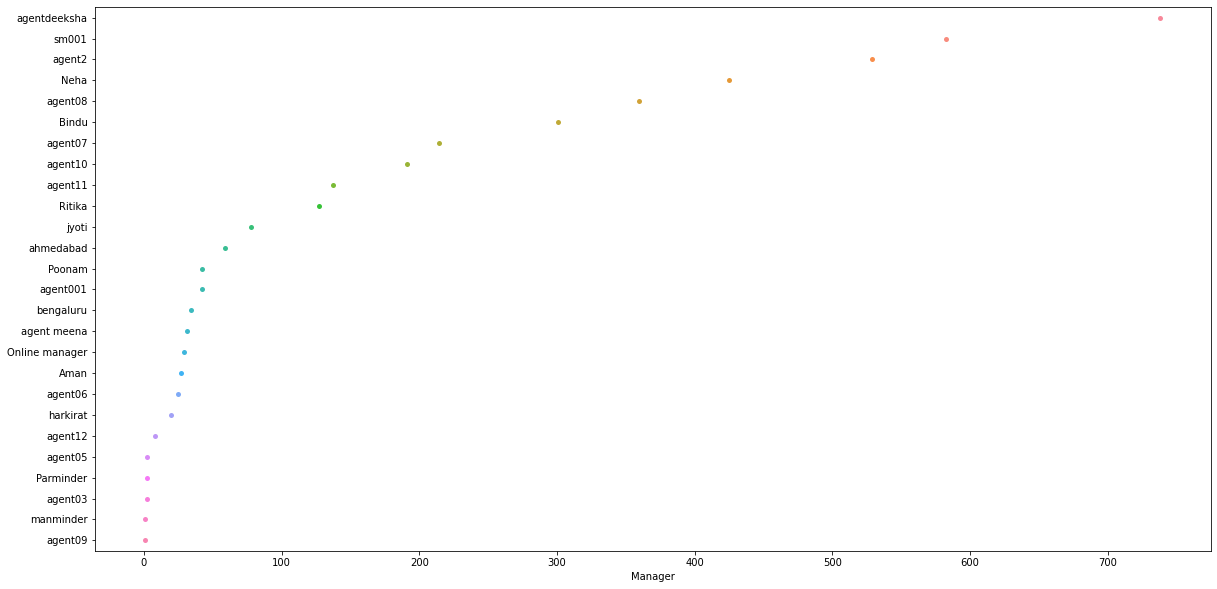

In [18]:
manager_followup = pd.DataFrame(manager_followup,columns=['Manager'])
plt.figure(figsize=(20,10))
sns.swarmplot(manager_followup.Manager,manager_followup.index)

In [19]:
# Percentage of queries from different sources
per_sub_sources = pd.DataFrame(data_join['Sub source'].value_counts()/data_join.shape[0]*100)
per_sub_sources

,Sub source
FB-LPF,56.022734
FBA,15.497233
GO-LPF,14.967565
OGN,2.779266
DIC GOOGLE,2.148426
FBC,1.844909
LPC,1.690174
IG,1.395584
OWF,1.350949
OW AP.,0.580254


In [20]:
data_join[data_join['Last Status']=='Hot Queries'].Source.value_counts()

Diet Clinic    624
Staytox         57
Others          13
DSA              1
Healthviser      1
Name: Source, dtype: int64

In [21]:
data_join.Manager.value_counts()

agentdeeksha      2629
sm001             2445
agent09           2215
agent meena       1919
jyoti             1863
agent03           1817
agent2            1683
agent05           1555
agent001          1478
Neha              1402
agent08           1202
agent12           1196
Ritika            1152
agent10           1132
Bindu             1055
agent06            962
agent07            905
agent11            891
hyderabad          728
Bhumika            719
ahmedabad          707
Online manager     639
bengaluru          508
Anamika            461
Parminder          428
harkirat           398
Poonam             353
agent04            271
Kanchan            219
Pune Clinic        212
lucknow            193
Goa Clinic         156
manminder           56
Aman                41
gurgaon              8
delhi                6
Vashi Clinic         2
Name: Manager, dtype: int64

In [22]:
data_join[data_join['Stage']=='Confirmed']

,Name,Manager,Date,Source,Sub source,Stage,Last Status,Country,State,City,location
Date,,,,,,,,,,,
2020-11-09,sudha 1,agent meena,2020-11-09,Diet Clinic,DIC GOOGLE,Confirmed,NaN,India,Punjab,Jalandhar,"Punjab, Jalandhar"
2021-01-09,rajinder 5,jyoti,2021-01-09,Diet Clinic,FBA,Confirmed,Not Reachable,India,Punjab,NaN,"Punjab, nan"
2021-01-15,sonika 1,jyoti,2021-01-15,Diet Clinic,DIC GOOGLE,Confirmed,Hot Queries,India,Punjab,Jalandhar,"Punjab, Jalandhar"


In [23]:
new_data = data_join.drop(['Name','Date'],axis=1)

In [24]:
agent = ['agentdeeksha','sm001','agent09' ,'agent meena' ,'jyoti','agent03','agent2','agent05','agent001',
         'Neha']             
#'Ritika']

lst = ['Punjab','Maharashtra','Uttar Pradesh','Haryana','Delhi','West Bengal','Karnataka','Jammu and Kashmir',
       'Gujarat','Telangana']

array = ['FB-LPF', 'FBA','GO-LPF','DIC GOOGLE','OGN']

In [25]:
India_data = new_data[new_data['Country']=='India']
India_data = India_data[India_data['Source']=='Diet Clinic']


# India_data = India_data[India_data['Sub source'].isin(array)]

# India_data = India_data[India_data['State'].isin(lst)]
# India_data = India_data[India_data['Manager'].isin(agent)]
# print(India_data)

filter_data = India_data.drop(['location','City','Country','Source','Last Status'],axis=1)
filter_data.reset_index(drop=True, inplace=True)
filter_data.Stage.value_counts()

Followup       15279
Lead           13394
Cancelled       2426
Appointment      496
Confirmed          3
Name: Stage, dtype: int64

In [26]:
# testing.Manager.value_counts() #/len(testing)*100

In [27]:
# testing[(testing.Stage=='Cancelled')& (testing.State=='Mizoram')].Manager.value_counts()

In [28]:
# testing[(testing.Manager=='agentdeeksha') & (testing.Stage=='Lead')].State.value_counts()    #Followup Cancelled

In [29]:
# testing[(testing.Manager=='agent09') & (testing.Stage=='Lead')].State.value_counts()    #Followup Cancelled

In [30]:
# testing[(testing.Manager=='sm001') & (testing.Stage=='Cancelled')].State.value_counts()    #Followup Cancelled

In [31]:
# testing[(testing.Manager=='sm001') & (testing.Stage=='Followup')].State.value_counts()    #Followup Cancelled

In [32]:
# testing[(testing.Stage=='Followup')].State.value_counts()  /testing.State.value_counts()*100   #Followup Cancelled

In [33]:
# testing[(testing.Stage=='Lead')].State.value_counts() /testing.State.value_counts()*100    #Followup Cancelled

In [34]:
# testing.State.value_counts()

In [35]:
# (testing[(testing.Stage=='Cancelled')].State.value_counts())/testing.State.value_counts()*100  #Followup Cancelled

In [36]:
# filter_data.Stage.value_counts()

In [37]:
testing = filter_data[(filter_data.Stage=='Followup')|(filter_data.Stage=='Lead')|(filter_data.Stage=='Cancelled')]
dummies = pd.get_dummies(data=testing, columns=['Manager', 'State','Sub source'])
x = dummies.drop('Stage',axis=1)
y = dummies['Stage'].apply(lambda x:1 if x=='Followup' else 0 if x=='Cancelled' else 2 ) 

In [38]:
y.value_counts()

1    15279
2    13394
0     2426
Name: Stage, dtype: int64

In [39]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = RandomOverSampler()
x,y = smote.fit_sample(x,y)

In [40]:
y.value_counts()

2    15279
1    15279
0    15279
Name: Stage, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# LR = LogisticRegression(max_iter=300) #. 'newton-cg', 'sag', and 'lbfgs'
LR = DecisionTreeClassifier()
# LR = SVC()
LR = MLPClassifier(max_iter=300,solver='adam') 
LR.fit(X_train,y_train)
LR.score(X_train,y_train)

0.609833930315858

In [42]:
LR.score(X_test,y_test)

0.5764527004693594

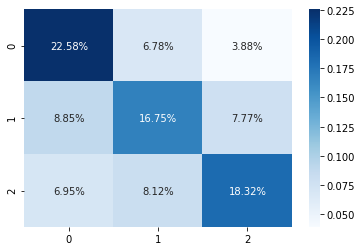

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_pred = LR.predict(X_test)
test_matrix = confusion_matrix(y_test, test_pred)
sns.heatmap(test_matrix/np.sum(test_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [44]:
dummies_data = pd.get_dummies(data=filter_data, columns=['Manager', 'Stage', 'State','Sub source'])

In [45]:
from sklearn.linear_model import LinearRegression


In [46]:
dummies_data

,Manager_Aman,Manager_Anamika,Manager_Bhumika,Manager_Bindu,Manager_Goa Clinic,Manager_Kanchan,Manager_Neha,Manager_Online manager,Manager_Parminder,Manager_Poonam,...,Sub source_LPC,Sub source_OGN,Sub source_OTH,Sub source_OW AP,Sub source_OW AP.,Sub source_OWF,Sub source_REF,Sub source_WWC,Sub source_YT,Sub source_fb-lpf
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
max_clusters = 50

In [48]:
from sklearn.cluster import KMeans
kmeans_tests = [KMeans(n_clusters=i, n_init=10) for i in range(1, max_clusters)]
inertias = [kmeans_tests[i].fit(dummies_data).inertia_ for i in range(len(kmeans_tests))]

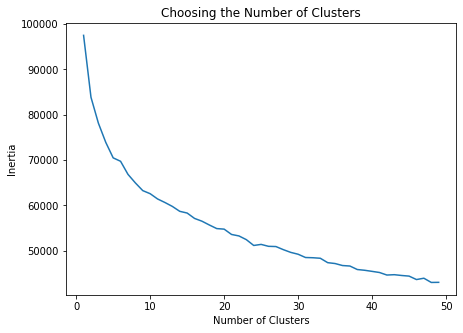

In [49]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, max_clusters), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Choosing the Number of Clusters")
plt.show()

In [50]:
kmeans = KMeans(n_clusters=6, n_init=10)
kmeans.fit(dummies_data)

KMeans(n_clusters=6)

In [51]:
clusters = kmeans.predict(dummies_data)
clusters

array([2, 2, 4, ..., 4, 5, 4], dtype=int32)

In [52]:
clusters.shape

(31598,)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(dummies_data), columns=['PC1', 'PC2'])

In [54]:
reduced_data

,PC1,PC2
0,0.671147,0.634567
1,0.707343,0.602554
2,-0.686207,0.537645
3,0.635333,0.702603
4,0.655940,0.627881
...,...,...
31593,-0.029341,0.802194
31594,-0.066947,0.834485
31595,-0.797231,0.885784
31596,0.671913,0.689898


In [55]:
# kmeans.cluster_centers_

In [56]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[ 0.6024137 , -0.55105288],
       [-0.79888629, -0.40721059],
       [ 0.75591922,  0.60214397],
       [-0.05418145,  0.06013947],
       [-0.68706065,  0.7277753 ],
       [ 0.66390062,  0.52152026]])

In [57]:
reduced_data['cluster'] = clusters
reduced_data['cluster'].value_counts()

0    8603
1    8083
4    5332
5    4030
2    3166
3    2384
Name: cluster, dtype: int64

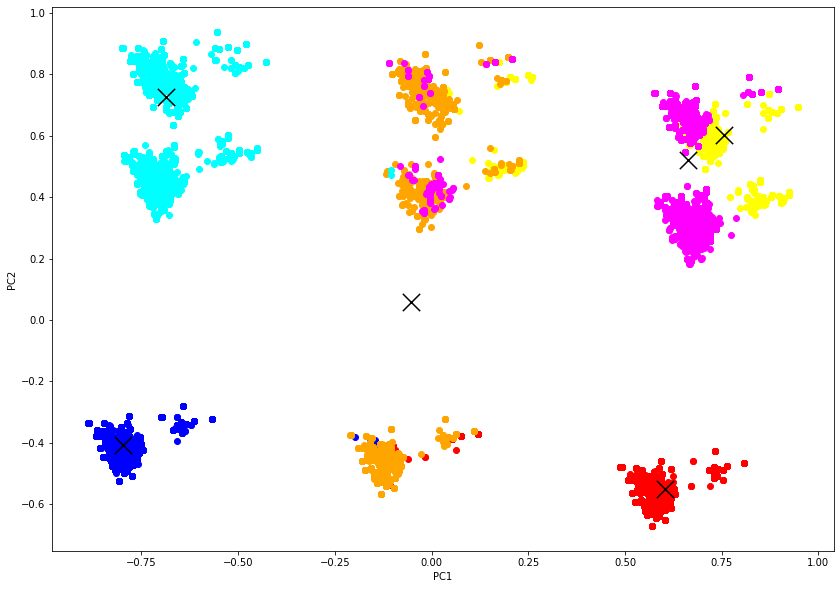

In [58]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')
plt.scatter(reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 4].loc[:, 'PC2'], color='cyan')
plt.scatter(reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 5].loc[:, 'PC2'], color='magenta')
plt.scatter(reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 6].loc[:, 'PC2'], color='brown')
plt.scatter(reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 7].loc[:, 'PC2'], color='pink')
plt.scatter(reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 8].loc[:, 'PC2'], color='green')
plt.scatter(reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 9].loc[:, 'PC2'], color='purple')
# plt.scatter(reduced_data[reduced_data['cluster'] == 10].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 10].loc[:, 'PC2'], color='purple')
# plt.scatter(reduced_data[reduced_data['cluster'] == 11].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 11].loc[:, 'PC2'], color='purple')
# plt.scatter(reduced_data[reduced_data['cluster'] == 12].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 12].loc[:, 'PC2'], color='purple')
# plt.scatter(reduced_data[reduced_data['cluster'] == 13].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 13].loc[:, 'PC2'], color='purple')
# plt.scatter(reduced_data[reduced_data['cluster'] == 14].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 14].loc[:, 'PC2'], color='purple')
# plt.scatter(reduced_data[reduced_data['cluster'] == 15].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 15].loc[:, 'PC2'], color='purple')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

In [59]:
filter_data['cluster'] = clusters
zero_cluster = filter_data[filter_data['cluster']==0]
one_cluster = filter_data[filter_data['cluster']==1]
two_cluster = filter_data[filter_data['cluster']==2]
three_cluster = filter_data[filter_data['cluster']==3]
four_cluster = filter_data[filter_data['cluster']==4]
five_cluster = filter_data[filter_data['cluster']==5]
six_cluster = filter_data[filter_data['cluster']==6]
seven_cluster = filter_data[filter_data['cluster']==7]
eight_cluster = filter_data[filter_data['cluster']==8]
nine_cluster = filter_data[filter_data['cluster']==9]

# ZERO

In [60]:
zero_cluster.Stage.value_counts()/len(filter_data)*100

Followup       26.669409
Appointment     0.556997
Name: Stage, dtype: float64

In [61]:
zero_cluster.State.value_counts()/len(filter_data)*100

Punjab                         5.547819
Uttar Pradesh                  3.664789
Maharashtra                    2.557124
Haryana                        2.414710
Delhi                          2.057092
Jammu and Kashmir              1.591873
Karnataka                      1.376669
West Bengal                    1.224761
Gujarat                        1.224761
Telangana                      0.765871
Odisha                         0.525350
Madhya Pradesh                 0.420913
Rajasthan                      0.417748
Uttarakhand                    0.411418
Goa                            0.401924
Chandigarh                     0.389265
Assam                          0.379771
Bihar                          0.332300
Tamil Nadu                     0.281663
Himachal Pradesh               0.240522
Andhra Pradesh                 0.227863
Jharkhand                      0.202544
Kerala                         0.151908
Chhattisgarh                   0.142414
Tripura                        0.113931


In [62]:
zero_cluster['Sub source'].value_counts()

FB-LPF    8603
Name: Sub source, dtype: int64

In [63]:
zero_cluster.Manager.value_counts()/len(filter_data)*100

Neha              2.383062
jyoti             2.351415
agent09           2.215330
agent meena       1.962150
agent05           1.465283
agent10           1.455788
agent07           1.379834
Bindu             1.367175
agentdeeksha      1.310210
agent08           1.132983
agent001          1.104500
sm001             0.924109
agent11           0.886132
Online manager    0.854484
agent06           0.680423
agent03           0.632951
agent2            0.582315
Ritika            0.436737
bengaluru         0.433572
hyderabad         0.424077
Bhumika           0.414583
Anamika           0.411418
Parminder         0.408254
ahmedabad         0.392430
agent12           0.303817
harkirat          0.272169
lucknow           0.199380
Kanchan           0.196215
Pune Clinic       0.196215
Goa Clinic        0.174062
Poonam            0.107602
manminder         0.091778
agent04           0.072789
delhi             0.003165
Name: Manager, dtype: float64

# ONE

In [64]:
one_cluster.Stage.value_counts()/len(filter_data)*100

Lead           25.520603
Appointment     0.060130
Name: Stage, dtype: float64

In [65]:
one_cluster.State.value_counts()/len(filter_data)*100

Maharashtra                    3.519210
Uttar Pradesh                  3.183746
Haryana                        2.129882
Punjab                         2.012786
West Bengal                    1.851383
Jammu and Kashmir              1.848218
Delhi                          1.623520
Karnataka                      1.246914
Gujarat                        1.006393
Rajasthan                      0.708906
Madhya Pradesh                 0.674093
Telangana                      0.648775
Odisha                         0.601304
Chandigarh                     0.553833
Assam                          0.534844
Uttarakhand                    0.487373
Bihar                          0.484208
Tamil Nadu                     0.446231
Andhra Pradesh                 0.376606
Goa                            0.376606
Himachal Pradesh               0.313311
Kerala                         0.291158
Jharkhand                      0.186721
Chhattisgarh                   0.151908
Tripura                        0.117096


In [66]:
one_cluster['Sub source'].value_counts()

FB-LPF    8083
Name: Sub source, dtype: int64

In [67]:
two_cluster.Manager.value_counts()/len(filter_data)*100

jyoti             2.120387
agent meena       1.443129
agent2            1.158301
agentdeeksha      0.898791
agent11           0.620292
agent08           0.525350
agent05           0.496867
sm001             0.420913
agent001          0.382936
agent10           0.262675
harkirat          0.259510
agent03           0.221533
agent06           0.189885
agent07           0.174062
Neha              0.170897
agent09           0.145579
Bindu             0.101272
agent12           0.079119
Kanchan           0.053801
Parminder         0.047471
ahmedabad         0.047471
bengaluru         0.037977
Goa Clinic        0.025318
hyderabad         0.025318
Ritika            0.018989
agent04           0.018989
Pune Clinic       0.015824
Online manager    0.015824
Aman              0.012659
lucknow           0.009494
Bhumika           0.009494
manminder         0.006330
Anamika           0.003165
Name: Manager, dtype: float64

# TWO

In [68]:
two_cluster.Stage.value_counts()

Followup       2946
Appointment     175
Cancelled        42
Confirmed         3
Name: Stage, dtype: int64

In [69]:
two_cluster.State.value_counts()/len(filter_data)*100

Punjab                         4.940186
Maharashtra                    1.019052
Haryana                        0.835496
Chandigarh                     0.538009
Delhi                          0.376606
Uttar Pradesh                  0.351288
West Bengal                    0.250016
Karnataka                      0.215203
Kerala                         0.167732
Telangana                      0.167732
Himachal Pradesh               0.161403
Gujarat                        0.151908
Jammu and Kashmir              0.148744
Rajasthan                      0.113931
Assam                          0.075954
Madhya Pradesh                 0.075954
Uttarakhand                    0.072789
Odisha                         0.063295
Bihar                          0.053801
Goa                            0.050636
Tamil Nadu                     0.047471
Jharkhand                      0.037977
Andhra Pradesh                 0.034812
Chhattisgarh                   0.028483
Tripura                        0.018989


In [70]:
two_cluster['Sub source'].value_counts()

FBA             2476
DIC GOOGLE       218
OGN              175
FBC               55
IG                51
OWF               46
LPC               41
DIC FACEBOOK      32
FBI               24
OW AP.            23
OW AP             15
WWC                8
YT                 1
fb-lpf             1
Name: Sub source, dtype: int64

In [71]:
two_cluster.Manager.value_counts()/len(filter_data)*100

jyoti             2.120387
agent meena       1.443129
agent2            1.158301
agentdeeksha      0.898791
agent11           0.620292
agent08           0.525350
agent05           0.496867
sm001             0.420913
agent001          0.382936
agent10           0.262675
harkirat          0.259510
agent03           0.221533
agent06           0.189885
agent07           0.174062
Neha              0.170897
agent09           0.145579
Bindu             0.101272
agent12           0.079119
Kanchan           0.053801
Parminder         0.047471
ahmedabad         0.047471
bengaluru         0.037977
Goa Clinic        0.025318
hyderabad         0.025318
Ritika            0.018989
agent04           0.018989
Pune Clinic       0.015824
Online manager    0.015824
Aman              0.012659
lucknow           0.009494
Bhumika           0.009494
manminder         0.006330
Anamika           0.003165
Name: Manager, dtype: float64

# THREE

In [72]:
three_cluster.Stage.value_counts()

Cancelled    2384
Name: Stage, dtype: int64

In [73]:
three_cluster.State.value_counts()/len(filter_data)*100

Uttar Pradesh                  1.050699
Delhi                          0.816507
Punjab                         0.775366
Karnataka                      0.708906
Haryana                        0.689917
Gujarat                        0.553833
Telangana                      0.481043
Maharashtra                    0.443066
West Bengal                    0.325970
Jammu and Kashmir              0.300652
Rajasthan                      0.189885
Bihar                          0.148744
Odisha                         0.145579
Madhya Pradesh                 0.132920
Tamil Nadu                     0.117096
Andhra Pradesh                 0.098107
Chandigarh                     0.088613
Kerala                         0.085448
Himachal Pradesh               0.079119
Uttarakhand                    0.060130
Assam                          0.060130
Goa                            0.044307
Jharkhand                      0.041142
Chhattisgarh                   0.031648
Meghalaya                      0.018989


In [74]:
three_cluster['Sub source'].value_counts()/len(filter_data)*100

FB-LPF          4.044560
GO-LPF          1.943161
FBA             0.579151
DIC GOOGLE      0.205709
OWF             0.186721
OGN             0.148744
LPC             0.123426
WWC             0.091778
FBC             0.082284
IG              0.056966
OW AP.          0.034812
FBI             0.031648
DIC FACEBOOK    0.009494
YT              0.003165
FB AP.          0.003165
Name: Sub source, dtype: float64

In [75]:
three_cluster.Manager.value_counts()/len(filter_data)*100

agent09           1.057029
hyderabad         0.762707
bengaluru         0.604469
agent08           0.500032
ahmedabad         0.462055
sm001             0.338629
agent03           0.306981
agent05           0.297487
jyoti             0.284828
agent meena       0.281663
agent001          0.272169
Neha              0.269004
Bindu             0.231027
agent07           0.221533
agentdeeksha      0.202544
Anamika           0.202544
Ritika            0.164567
Parminder         0.151908
agent11           0.148744
agent10           0.126590
Bhumika           0.094943
agent2            0.091778
Poonam            0.072789
Online manager    0.066460
lucknow           0.063295
harkirat          0.060130
Kanchan           0.047471
agent12           0.034812
agent06           0.034812
Pune Clinic       0.031648
Goa Clinic        0.022153
manminder         0.022153
agent04           0.015824
Name: Manager, dtype: float64

# FOUR

In [76]:
four_cluster.Stage.value_counts()/len(filter_data)*100

Lead           16.868156
Appointment     0.006330
Name: Stage, dtype: float64

In [77]:
four_cluster.State.value_counts()/len(filter_data)*100

Maharashtra                    2.829293
Punjab                         2.028609
Uttar Pradesh                  1.386164
Haryana                        1.199443
West Bengal                    1.193113
Delhi                          0.743718
Chandigarh                     0.740553
Rajasthan                      0.607633
Kerala                         0.566492
Telangana                      0.544338
Gujarat                        0.541173
Karnataka                      0.534844
Jammu and Kashmir              0.522185
Tamil Nadu                     0.462055
Madhya Pradesh                 0.386100
Odisha                         0.360782
Himachal Pradesh               0.351288
Bihar                          0.351288
Andhra Pradesh                 0.316476
Assam                          0.256345
Uttarakhand                    0.215203
Jharkhand                      0.199380
Goa                            0.155073
Chhattisgarh                   0.139249
Tripura                        0.088613


In [78]:
four_cluster['Sub source'].value_counts()/len(filter_data)*100

GO-LPF          6.921324
FBA             5.829483
LPC             0.914615
OGN             0.626622
FBC             0.522185
IG              0.503196
OWF             0.389265
DIC GOOGLE      0.389265
FBI             0.246851
OW AP.          0.227863
WWC             0.158238
DIC FACEBOOK    0.072789
OW AP           0.037977
YT              0.018989
FB AP.          0.009494
fb-lpf          0.003165
REF             0.003165
Name: Sub source, dtype: float64

In [79]:
four_cluster.Manager.value_counts()/len(filter_data)*100

sm001             2.034939
agent12           1.670992
agent2            1.544402
agentdeeksha      1.284891
agent03           1.063358
agent09           0.841825
agent meena       0.737388
Ritika            0.724729
agent001          0.718400
agent05           0.544338
agent06           0.541173
ahmedabad         0.452560
agent10           0.449396
agent11           0.376606
Poonam            0.348123
hyderabad         0.341794
jyoti             0.306981
harkirat          0.300652
agent08           0.297487
Bhumika           0.287993
Neha              0.275334
Bindu             0.275334
agent04           0.231027
Online manager    0.205709
agent07           0.189885
Parminder         0.164567
Anamika           0.151908
lucknow           0.107602
Goa Clinic        0.104437
Pune Clinic       0.091778
Kanchan           0.088613
bengaluru         0.072789
Aman              0.025318
delhi             0.012659
Vashi Clinic      0.006330
manminder         0.003165
Name: Manager, dtype: float6

# Five


In [80]:
five_cluster.Stage.value_counts()/len(filter_data)*100

Followup       12.361542
Appointment     0.392430
Name: Stage, dtype: float64

In [81]:
five_cluster.State.value_counts()/len(filter_data)*100

Maharashtra                    1.629850
Uttar Pradesh                  1.458953
Haryana                        1.205773
Delhi                          1.047535
Punjab                         1.022217
Karnataka                      0.762707
Gujarat                        0.756377
Telangana                      0.683588
Chandigarh                     0.655105
West Bengal                    0.572821
Rajasthan                      0.458890
Madhya Pradesh                 0.319640
Jammu and Kashmir              0.237357
Odisha                         0.227863
Tamil Nadu                     0.221533
Andhra Pradesh                 0.202544
Kerala                         0.193050
Bihar                          0.186721
Jharkhand                      0.177226
Uttarakhand                    0.158238
Himachal Pradesh               0.129755
Assam                          0.117096
Chhattisgarh                   0.098107
Goa                            0.079119
Tripura                        0.053801


In [82]:
five_cluster['Sub source'].value_counts()/len(filter_data)*100

GO-LPF          6.981455
OGN             1.534907
DIC GOOGLE      0.930439
OWF             0.699411
LPC             0.556997
FBC             0.528514
IG              0.414583
DIC FACEBOOK    0.354453
OW AP.          0.272169
FBI             0.237357
OW AP           0.094943
WWC             0.088613
YT              0.028483
fb-lpf          0.012659
OTH             0.012659
FB LBF          0.003165
FB AP.          0.003165
Name: Sub source, dtype: float64

In [83]:
five_cluster.Manager.value_counts()/len(filter_data)*100

agentdeeksha      1.705804
sm001             0.917780
agent2            0.895626
agent08           0.863979
agent09           0.674093
ahmedabad         0.658270
agent05           0.645610
hyderabad         0.582315
Neha              0.550668
agent03           0.468384
jyoti             0.462055
bengaluru         0.386100
agent meena       0.376606
agent001          0.363947
agent10           0.303817
agent07           0.294322
Ritika            0.275334
Bindu             0.272169
Parminder         0.262675
Online manager    0.256345
Pune Clinic       0.221533
agent06           0.199380
Kanchan           0.193050
agent12           0.155073
harkirat          0.155073
Bhumika           0.145579
agent11           0.132920
lucknow           0.107602
Anamika           0.069625
Aman              0.056966
Goa Clinic        0.047471
Poonam            0.031648
agent04           0.015824
delhi             0.003165
manminder         0.003165
Name: Manager, dtype: float64

# SIX

In [84]:
six_cluster

,Manager,Sub source,Stage,State,cluster


In [85]:
six_cluster.Stage.value_counts()/len(filter_data)*100

Series([], Name: Stage, dtype: float64)

In [86]:
six_cluster.State.value_counts()/len(filter_data)*100

Series([], Name: State, dtype: float64)

In [87]:
six_cluster['Sub source'].value_counts()/len(filter_data)*100

Series([], Name: Sub source, dtype: float64)

# SEVEN

In [88]:
seven_cluster.Stage.value_counts()/len(filter_data)*100

Series([], Name: Stage, dtype: float64)

In [89]:
seven_cluster.State.value_counts()/len(filter_data)*100

Series([], Name: State, dtype: float64)

In [90]:
seven_cluster['Sub source'].value_counts()/len(filter_data)*100

Series([], Name: Sub source, dtype: float64)

# EIGHT

In [91]:
eight_cluster.Stage.value_counts()/len(filter_data)*100

Series([], Name: Stage, dtype: float64)

In [92]:
eight_cluster.State.value_counts()/len(filter_data)*100

Series([], Name: State, dtype: float64)

In [93]:
eight_cluster['Sub source'].value_counts()/len(filter_data)*100

Series([], Name: Sub source, dtype: float64)

# NINE

In [94]:
nine_cluster.Stage.value_counts()/len(filter_data)*100

Series([], Name: Stage, dtype: float64)

In [95]:
nine_cluster.State.value_counts()/len(filter_data)*100

Series([], Name: State, dtype: float64)

In [96]:
nine_cluster['Sub source'].value_counts()/len(filter_data)*100

Series([], Name: Sub source, dtype: float64)